In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics      import accuracy_score


def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput,weights) > 0):
            nCorrect += 1
    return 100 * nCorrect / N

In [3]:
NumDataPerClass = 200

# Two class problem, different means, equal covariance matrices
m1, m2 = [[2.5,2.5]] , [[10,10]]
C = [[2,1],[1,2]]

A = np.linalg.cholesky(C)
X1 = np.random.randn(NumDataPerClass,2)
X2 = np.random.randn(NumDataPerClass,2)
Y1 = X1@A + m1
Y2 = X2@A + m2

Y = np.concatenate((Y1,Y2))
Y = np.append(Y, np.ones((2*NumDataPerClass,1)), axis=1) # Add another dimension filled with ones

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


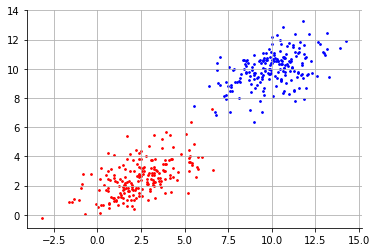

In [4]:
plt.scatter(Y1[:,0], Y1[:,1],s=3,c="r")
plt.scatter(Y2[:,0], Y2[:,1],s=3,c="b")
plt.grid(True)

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [6]:
# Label data with +1 and -1 for each class
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass)
f = np.concatenate((labelPos, labelNeg))

# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass)
Yr = Y[rIndex,]
fr = f[rIndex]

# Training and test sets (50/50)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test  = Yr[NumDataPerClass:2*NumDataPerClass]
f_test  = fr[NumDataPerClass:2*NumDataPerClass]

print(Y_train.shape,f_train.shape,Y_test.shape,f_test.shape)

Ntrain, Ntest = NumDataPerClass, NumDataPerClass

(200, 3) (200,) (200, 3) (200,)


In [5]:
# Random initialisation of weights
#a= [-0.42118436, 0.61870777] # Gave 100%
a = np.random.randn(3)
print(a)

# Check performance with initial random weights
print("Percentage correct before training:", PercentCorrect(Y_train,f_train,a))

# Number of iterations & learning rate
MaxIter = 800
alpha   = 0.01

# Space for plots
P_train = np.zeros(MaxIter)
P_test  = np.zeros(MaxIter)

#_______ MAIN LOOP ________#
for iter in range(MaxIter):
    # Select a random data point
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:]
    
    # If misclassified, then update the weights
    if (f_train[r] * np.dot(y,a) < 0):
        a += alpha * f_train[r] * y
        
    # Evaluate trianing and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train,f_train,a)
    P_test[iter]  = PercentCorrect(Y_test, f_test, a)

print("Percentage correct after training: ", PercentCorrect(Y_train,f_train,a),PercentCorrect(Y_test,f_test,a))

[-0.6023081   0.16362408 -0.00613567]
Percentage correct before training: 59.5
Percentage correct after training:  100.0 99.5


[-0.04366388 -0.03101524  0.40386433]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


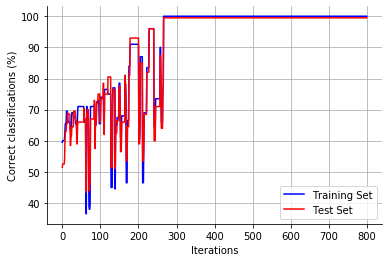

In [10]:
plt.plot(range(MaxIter), P_train, "b", range(MaxIter),P_test,"r")
plt.grid(True)
plt.gca().legend(("Training Set","Test Set"))
plt.xlabel("Iterations")
plt.ylabel("Correct classifications (%)")
print(a)

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#plt.savefig("lab2-prob2-training.svg", format="svg")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


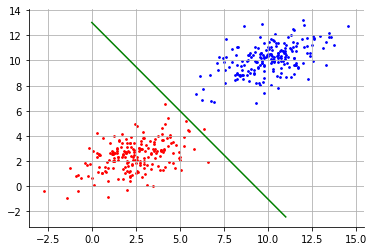

In [14]:
plt.scatter(Y1[:,0], Y1[:,1],s=3,c="r")
plt.scatter(Y2[:,0], Y2[:,1],s=3,c="b")
plt.grid(True)

x=np.linspace(0,11)
plt.plot(x, -(a[0]*x+a[2])/a[1], c="g") # Plot the separating line (x,y,1) dot (a0,a1,a2) = 0 = x*a0 + y*a1 + a2
# y = -(x*a0+a2)/a1

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#plt.savefig("lab2-prob2-separation.svg", format="svg")

In [8]:
model = Perceptron()
model.fit(Y_train,f_train)
fh_train = model.predict(Y_train)
print(accuracy_score(fh_train,f_train))

1.0


In [9]:
'''O = np.ones((2*NumDataPerClass,1))
Y = np.append(Y,O,axis=1)

a = np.random.randn(3)'''

'O = np.ones((2*NumDataPerClass,1))\nY = np.append(Y,O,axis=1)\n\na = np.random.randn(3)'